2 var qualitatives

In [19]:
# library("ggplot2")
library("ggpubr")


ERROR: Error in library("ggpubr"): there is no package called 'ggpubr'


In [2]:
data=read.csv(file.choose(),header=T,sep=",")
attach(data)
data[1:5,]

X,statut,age,expérience.professionnelle,temps.passé.moyen.sur.internet,appareil.préféré.de.consultation,nombre.de.boites.mail,nombre.de.messagerie.consultées.régulièrement,fréquence.de.consultation.de.la.messagerie,nombre.de.mails.reçus.par.jour,...,lecture.de.tous.les.mails,lecture.de.l.objet.expéditeur,nombre.de.mails.non.lus,nombre.de.mails.envoyés.par.semaine,réponse.à.des.mails.nécessitant.une.réponse,consultation.de.mails.en.dehors.des.heures.de.travail.études,personnalisation.de.la.messagerie,importance.de.l.ergonomie,sentiment.envers.de.zéro.inbox,autre.fonctionnalité.de.la.boite.mail
1,3A,23,Expérience > 6 mois,6,Un ordinateur,3,2,< 10,5,...,En grande partie,Oui,0,4,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
2,Enseignant,34,Ça se compte en années,7,Un ordinateur,3,2,> 10,50,...,Quasiment tous,Oui,5,100,Oui,Oui,Oui,Très importante,Lire tous les mails,"Oui, souvent"
3,1A,20,Entre 1 et 6 mois,4,Un smartphone,5,4,< 3,2,...,Rarement,Oui,0,1,Oui,Non,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
4,Autre,26,Expérience > 6 mois,8,Un ordinateur,2,2,> 10,10,...,Rarement,Oui,0,3,Parfois,Non,Oui,Relativement importante,Marquer tout en lu,"Oui, parfois"
6,Enseignant,35,Ça se compte en années,5,Un ordinateur,2,2,> 10,20,...,Rarement,Oui,0,50,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"


##########################lecture des mails & statut ##########################

In [10]:

chisq.test(lecture.de.tous.les.mails,statut) 


Warning message in chisq.test(lecture.de.tous.les.mails, statut):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  lecture.de.tous.les.mails and statut
X-squared = 23.758, df = 14, p-value = 0.04901


Ce warning nous indique que le test du χ2 n’est pas valable dans le cas présent. Nous devons utiliser le test exact de Fisher. 

In [7]:
fisher.test(data$lecture.de.tous.les.mails,data$statut,simulate.p.value=TRUE)



	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  data$lecture.de.tous.les.mails and data$statut
p-value = 0.03998
alternative hypothesis: two.sided


avec un p value petit on peut conclure qu'il y a un lien entre les variables. 
on peut valider cette relation à l'aide d'un tableau des effectifs


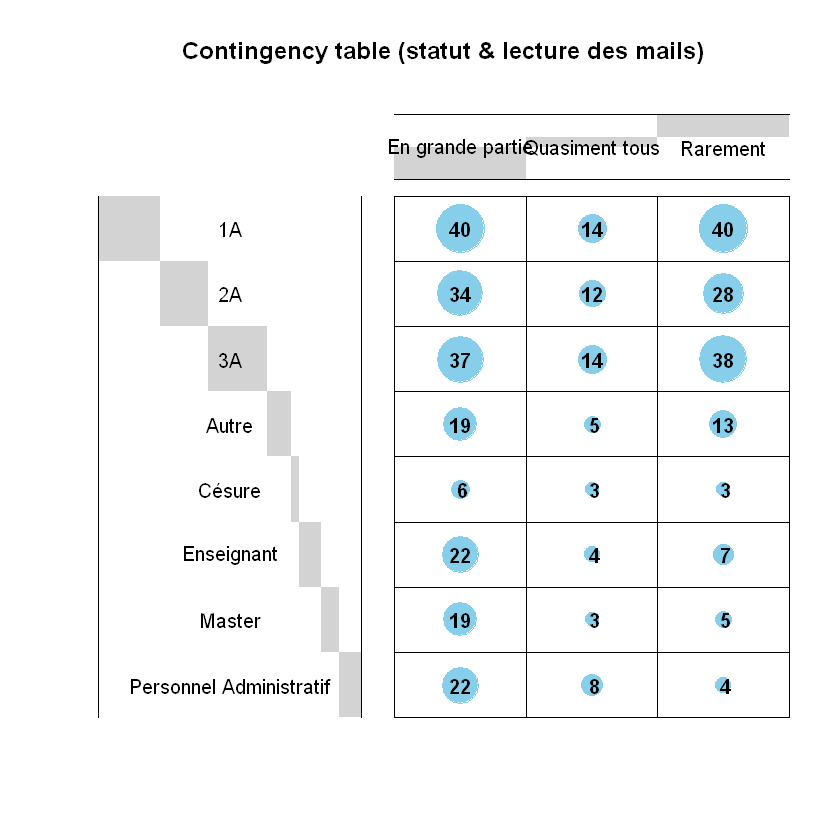

In [26]:
# table(lecture.de.tous.les.mails,statut)
library("ggplot2")
# library("ggpubr")
library("gplots")
balloonplot(table(lecture.de.tous.les.mails,statut), main ="Contingency table (statut & lecture des mails)", xlab ="", ylab="",
            label = T, show.margins = FALSE)

##########################notification et fréquence de consultation##########################

In [11]:
chisq.test(notification.de.mails,fréquence.de.consultation.de.la.messagerie)


	Pearson's Chi-squared test

data:  notification.de.mails and fréquence.de.consultation.de.la.messagerie
X-squared = 1.3525, df = 3, p-value = 0.7167


pas de warning ==> cela veut dire que le test du χ2 est valide. mais avec un p value non significatif, on conclut qu'il n'existe pas de lien entre les variables.


tableau des effectifs

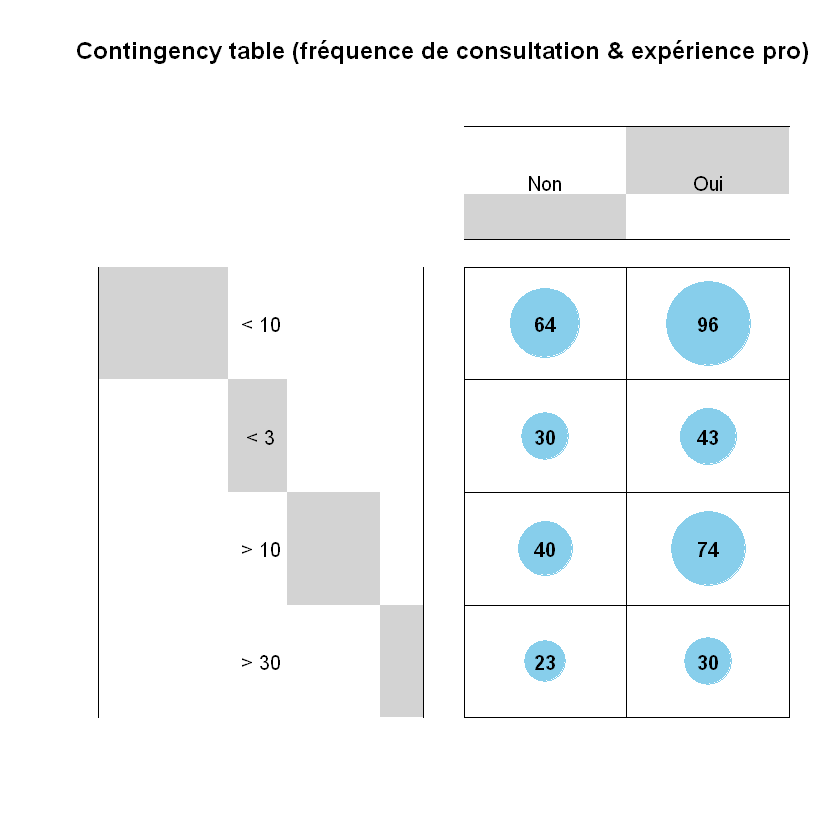

In [23]:
# table(notification.de.mails,fréquence.de.consultation.de.la.messagerie)
balloonplot(table(notification.de.mails,fréquence.de.consultation.de.la.messagerie), main ="Contingency table (fréquence de consultation & expérience pro)", xlab ="", ylab="",
            label = T, show.margins = FALSE)

In [13]:
chisq.test(fréquence.de.consultation.de.la.messagerie, expérience.professionnelle)


	Pearson's Chi-squared test

data:  fréquence.de.consultation.de.la.messagerie and expérience.professionnelle
X-squared = 72.302, df = 9, p-value = 5.375e-12


p value très petit ==> lien existant

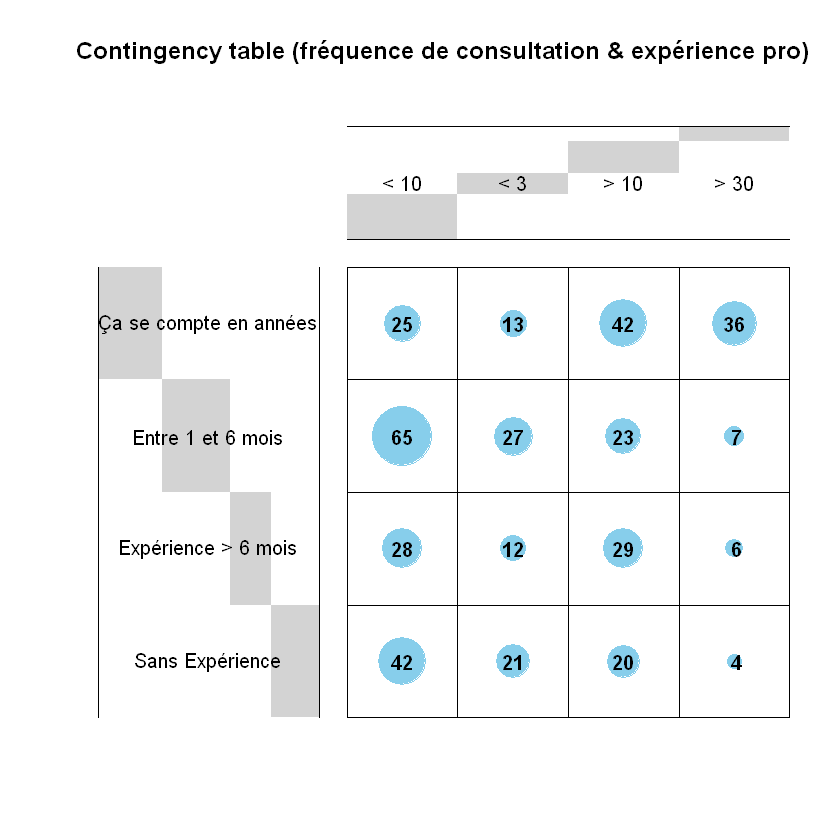

In [24]:
# table(fréquence.de.consultation.de.la.messagerie, expérience.professionnelle)
balloonplot(table(fréquence.de.consultation.de.la.messagerie, expérience.professionnelle), main ="Contingency table (fréquence de consultation & expérience pro)", xlab ="", ylab="",
            label = T, show.margins = FALSE)

##########################lecture &  concerné##########################

In [15]:
chisq.test(concerné,lecture.de.tous.les.mails)

Warning message in chisq.test(concerné, lecture.de.tous.les.mails):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  concerné and lecture.de.tous.les.mails
X-squared = 86.469, df = 6, p-value < 2.2e-16


In [3]:
fisher.test(concerné,lecture.de.tous.les.mails)


	Fisher's Exact Test for Count Data

data:  concerné and lecture.de.tous.les.mails
p-value < 2.2e-16
alternative hypothesis: two.sided


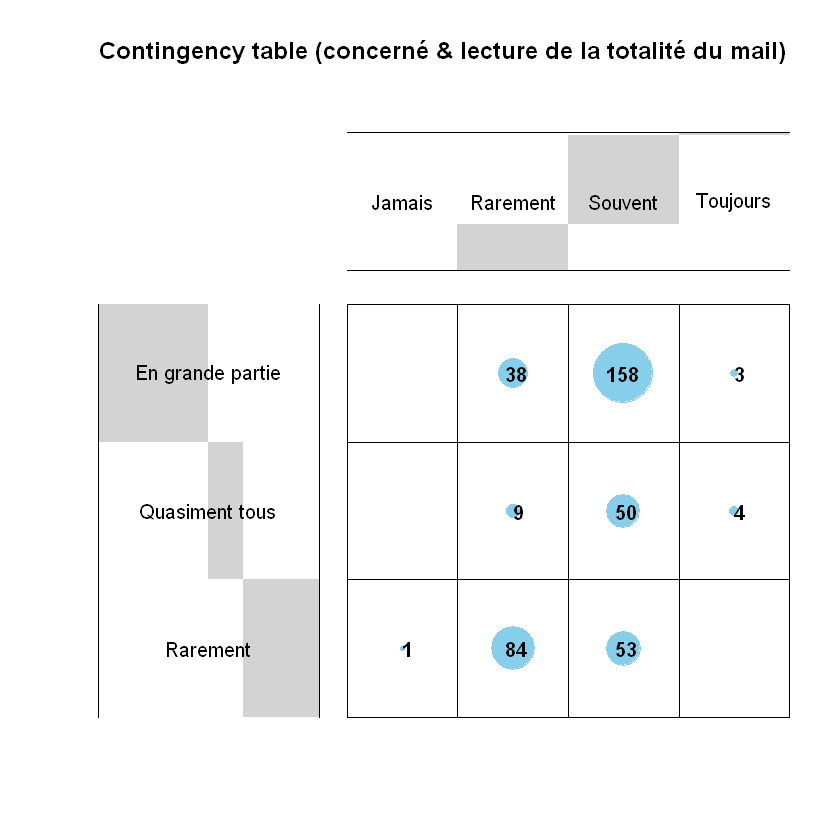

In [25]:
balloonplot(table(concerné,lecture.de.tous.les.mails), main ="Contingency table (concerné & lecture de la totalité du mail)", xlab ="", ylab="",
            label = T, show.margins = FALSE)

warning ==> test de fisher